# Алгоритмы анализа данных

### Домашнее задание №3 Урок 3. Логистическая регрессия. Log Loss

In [1]:
## вводные данные к ДЗ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [5]:
def standardization(x: np.ndarray) -> np.ndarray:
    s = (x - x.mean()) / x.std()
    return s

X_st = X.copy()
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

#### 1.Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [6]:
'''def calc_logloss(y, p):
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err'''

'def calc_logloss(y, p):\n    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))\n    return err'

In [7]:
def calc_logloss(y, p):
    # обработка данных, чтобы в расчет не попадали числа 0 и 1, тк в противном случае ылгоритм выдаст ошибку    
    np.clip(p, 1e-10, (1-1e-10))    
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

In [8]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, eta=1e-4, meaning=0.):    
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    errs=[]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]        
        err = calc_logloss(y, pred)        
        errs.append(err)
        w -= eta * (1/n * np.dot((pred - y), X))
        if err<=meaning:            
            #print(f"точка останова {i}, {eta}, {w}, {err}")
            break
        #if i % (iterations / 10) == 0:            
            #print(f"{i}, {eta}, {w}, {err}")
    print(f"точка останова: iterations = {i}, eta = {eta}, w = {w}, err = {err}")
    return w,errs

In [9]:
w, errs = eval_LR_model(X_st, y, 1000, 1e-1)

точка останова: iterations = 1000, eta = 0.1, w = [-2.77136565 -0.99588853  0.56641089  3.26813012], err = 0.40587815270727734


In [10]:
pred = sigmoid(np.dot(X_st, w))
print('prob =', pred.round(2))
print('true =', y)
print('pred =', np.where(pred > 0.5, 1, 0))

prob = [0.26 0.31 0.82 0.28 0.79 0.57 0.94 0.15 0.25 0.86]
true = [0 0 1 0 1 0 1 0 1 1]
pred = [0 0 1 0 1 1 1 0 0 1]


#### 2.На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss не превышал значение 0.3 (0.1). Как изменились веса?

точка останова: iterations = 1000, eta = 0.1, w = [-2.77136565 -0.99588853  0.56641089  3.26813012], err = 0.40587815270727734
0.40587815270727734
точка останова: iterations = 2000, eta = 0.10500000000000001, w = [-4.7401179  -1.04070524 -0.19439969  4.54568871], err = 0.3497838325465856
0.3497838325465856
точка останова: iterations = 3000, eta = 0.11000000000000001, w = [-6.24708188 -1.10440868 -0.74015074  5.60472853], err = 0.31877517376486014
0.31877517376486014
точка останова: iterations = 3877, eta = 0.11500000000000002, w = [-7.38657909 -1.16938636 -1.13098171  6.44966838], err = 0.2999930632665711
0.2999930632665711
точка останова: iterations = 3716, eta = 0.12000000000000002, w = [-7.38719444 -1.16942454 -1.13118885  6.45013294], err = 0.29998443173780925
0.29998443173780925


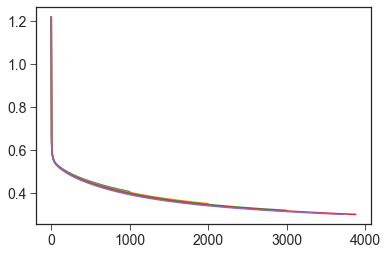

In [11]:
eta = 0.1
iterations = 1000
logloss_03 = 1000
while iterations <= 5001:
    w_it1, errs = eval_LR_model(X_st, y, iterations, eta, 0.3)
    logloss_03 = (errs[len(errs)-1])
    print(logloss_03)
    iterations += 1000
    eta += 0.005 
    plt.plot(errs)    
plt.show()

точка останова: iterations = 1000, eta = 0.1, w = [-2.77136565 -0.99588853  0.56641089  3.26813012], err = 0.40587815270727734
точка останова: iterations = 6000, eta = 0.15000000000000002, w = [-10.67267042  -1.40573819  -2.19513837   9.01476125], err = 0.25866317706248043
точка останова: iterations = 11000, eta = 0.2, w = [-17.08653886  -1.94203375  -4.15855934  14.19343835], err = 0.2024984800482502
точка останова: iterations = 16000, eta = 0.25, w = [-23.33048161  -2.48709058  -6.00977004  19.25874609], err = 0.1641579100655441
точка останова: iterations = 21000, eta = 0.3, w = [-29.12957528  -2.99899265  -7.69822801  23.95379367], err = 0.138398346549699
точка останова: iterations = 26000, eta = 0.35, w = [-34.44262346  -3.46721273  -9.22964786  28.23947825], err = 0.12073667001487964
точка останова: iterations = 31000, eta = 0.39999999999999997, w = [-39.34698915  -3.89436118 -10.63772982  32.17565917], err = 0.10804230415106805
точка останова: iterations = 34388, eta = 0.44999999

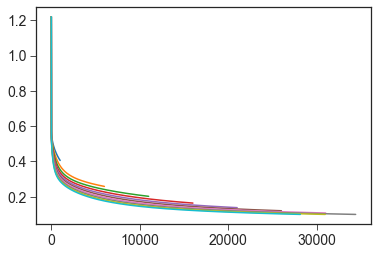

In [12]:
eta = 0.1
iterations = 1000
logloss_03 = 1000
while iterations <= 50001:
    w_it2, errs = eval_LR_model(X_st, y, iterations, eta, 0.1)
    logloss_03 = (errs[len(errs)-1])    
    iterations += 5000
    eta += 0.05 
    plt.plot(errs)

#### 3.Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model.

In [13]:
def calc_pred_proba(X_st, w):
    pred = sigmoid(np.dot(X_st, w))    
    return pred

In [14]:
print('prob =', calc_pred_proba(X_st, w))

prob = [0.25846265 0.3056887  0.81910473 0.28147361 0.79118436 0.57257036
 0.93504121 0.15077287 0.24742752 0.85843113]


#### 4.Создайте функцию calc_pred, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [15]:
def calc_pred_probability(X_st, w, probability):
    pred = sigmoid(np.dot(X_st, w))  
    print(pred)
    return np.where(pred > probability, 1, 0)

In [34]:
pred_new = calc_pred_probability(X_st, w, 0.80)
print('pred =', pred_new)
print('y    =', y)

[0.25846265 0.3056887  0.81910473 0.28147361 0.79118436 0.57257036
 0.93504121 0.15077287 0.24742752 0.85843113]
pred = [0 0 1 0 0 0 1 0 0 1]
y    = [0 0 1 0 1 0 1 0 1 1]


#### 5.(*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(y,columns=['y'])
df['pred']= pred_new
df

,y,pred
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
5,0,0
6,1,1
7,0,0
8,1,0
9,1,1


In [37]:
matrix_err = np.zeros((2,2))

In [38]:
matrix_err[0,0] = TP = df.loc[(df.y==1) & (df.pred==1)].shape[0]
matrix_err[0,1] = FP = df.loc[(df.y==0) & (df.pred==1)].shape[0]
matrix_err[1,0] = FN = df.loc[(df.y==1) & (df.pred==0)].shape[0]
matrix_err[1,1] = TN = df.loc[(df.y==0) & (df.pred==0)].shape[0]
TP, FP, FN, TN 

(3, 0, 2, 5)

In [39]:
print(f'Матрица ошибок:  \n{matrix_err}')

Матрица ошибок:  
[[3. 0.]
 [2. 5.]]


In [40]:
𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = (TP + TN) / df.shape[0]
𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦

0.8

In [41]:
𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = TP /(TP + FP)
𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛

1.0

In [42]:
𝑟𝑒𝑐𝑎𝑙𝑙 = TP / (TP + FN)
𝑟𝑒𝑐𝑎𝑙𝑙

0.6

In [43]:
F = (2 * 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 * 𝑟𝑒𝑐𝑎𝑙𝑙)/(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑟𝑒𝑐𝑎𝑙𝑙)
F

0.7499999999999999

In [44]:
FPR = FP / (FP + FN)
FPR

0.0

In [45]:
TPR = TP / (TP + FN)
TPR

0.6